In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE

In [55]:
data = pd.read_csv(r"C:\Users\mahesh\Documents\OneDrive_2025-03-10\Medical diagnosis using AI\Datasets\prepocessed_hypothyroid.csv")

In [57]:
# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Description:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           3772 non-null   float64
 1   sex           3772 non-null   float64
 2   on thyroxine  3772 non-null   int64  
 3   TSH           3772 non-null   float64
 4   T3 measured   3772 non-null   int64  
 5   T3            3772 non-null   float64
 6   TT4           3772 non-null   float64
 7   binaryClass   3772 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 235.9 KB
None

Dataset Description:
               age          sex  on thyroxine          TSH  T3 measured  \
count  3772.000000  3772.000000   3772.000000  3772.000000  3772.000000   
mean     51.735879     0.684705      0.123012     5.086766     0.796129   
std      20.082295     0.455362      0.328494    23.290853     0.402927   
min       1.000000     0.000000      0.000000     0.005000     0.000000

In [59]:
# Check for missing values
print("\nMissing Values in the Dataset:")
print(data.isnull().sum())


Missing Values in the Dataset:
age             0
sex             0
on thyroxine    0
TSH             0
T3 measured     0
T3              0
TT4             0
binaryClass     0
dtype: int64


In [61]:
data = data.dropna()

In [63]:
print(data.columns)

Index(['age', 'sex', 'on thyroxine', 'TSH', 'T3 measured', 'T3', 'TT4',
       'binaryClass'],
      dtype='object')


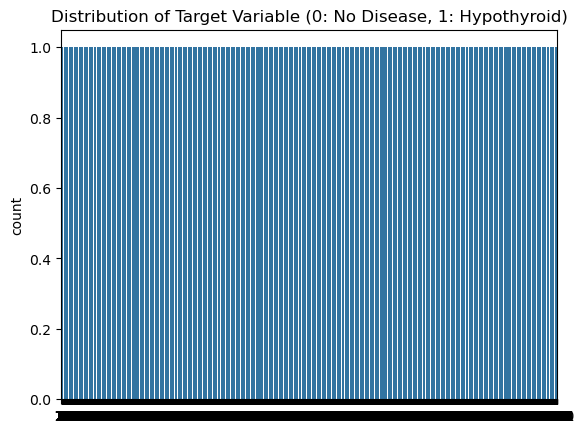

In [65]:
sns.countplot(data['binaryClass'])  # Replace with 'binaryClass' as the target column
plt.title('Distribution of Target Variable (0: No Disease, 1: Hypothyroid)')
plt.show()

In [66]:
X = data.drop(['binaryClass'], axis=1)  # Drop the correct target column 'binaryClass' from features
y = data['binaryClass']  # Assign 'binaryClass' as the target variable

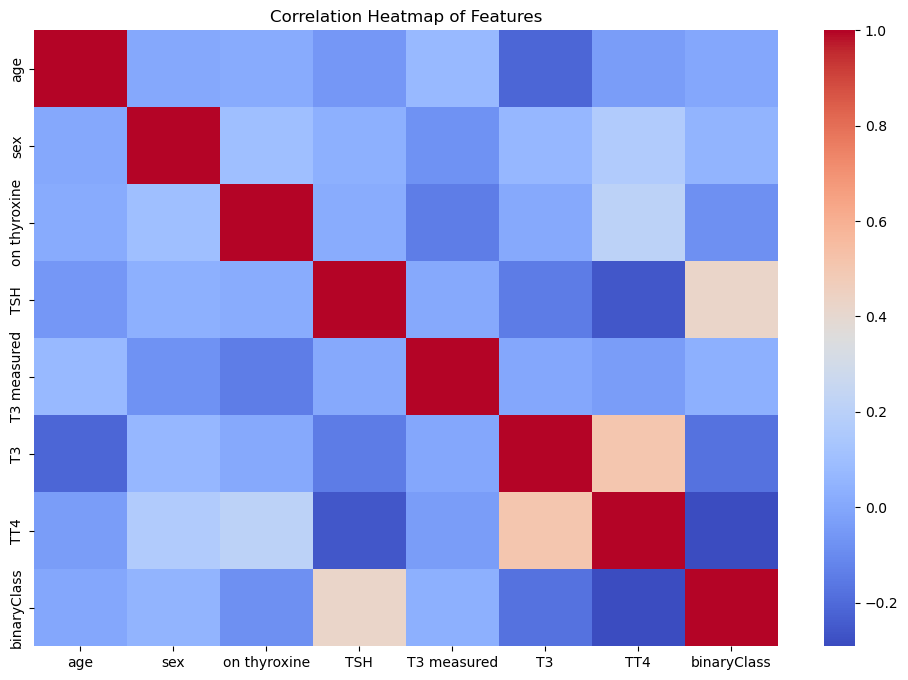

In [67]:
# Replace '?' with NaN (without triggering the warning)
data = data.replace('?', np.nan)

# Explicitly infer the object types to prevent the warning
data = data.infer_objects()

# Convert columns to numeric where applicable
data = data.apply(pd.to_numeric, errors='coerce')

# Now you can generate the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()



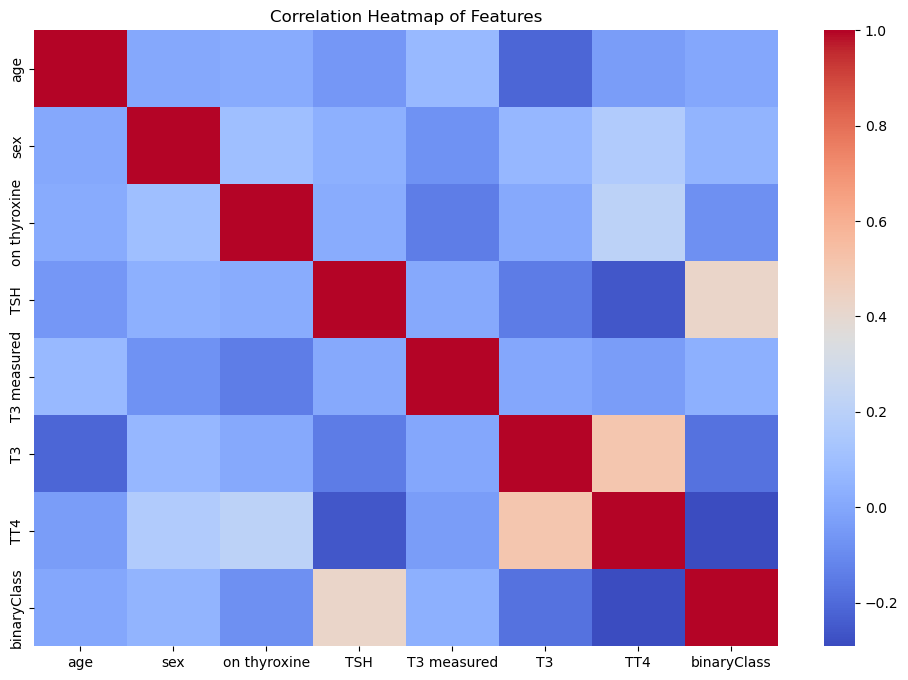

In [68]:

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

In [69]:
# Prepare data for model training
# 'binaryClass' is the target variable, drop it from the feature set
X = data.drop(['binaryClass'], axis=1)
y = data['binaryClass']

In [70]:
# Drop rows where the target variable is NaN
data_cleaned = data.dropna(subset=['binaryClass'])

# Redefine X and y after removing NaN rows
X = data_cleaned.drop(['binaryClass'], axis=1)
y = data_cleaned['binaryClass']

# Now perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [79]:
# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:


# Recursive Feature Elimination (RFE) for feature selection
rfe_selector = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=5, step=1)
X_train_rfe = rfe_selector.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe_selector.transform(X_test_scaled)


In [83]:
# Cross-validation with Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

In [85]:
# Perform 5-fold cross-validation
cv_scores_rf = cross_val_score(rf_model, X_train_rfe, y_train, cv=5)

In [87]:
# Print cross-validation results
print(f'Cross-validation Accuracy (5-fold): {np.mean(cv_scores_rf) * 100:.2f}%')
print(f'Standard Deviation: {np.std(cv_scores_rf) * 100:.2f}%')

Cross-validation Accuracy (5-fold): 99.27%
Standard Deviation: 0.31%


In [89]:
# Train the Random Forest model on the full training data after cross-validation
rf_model.fit(X_train_rfe, y_train)

RandomForestClassifier(random_state=42)

In [91]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_rfe)

In [93]:
# Evaluate the model performance on the test set
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'\nTest Accuracy: {accuracy_rf * 100:.2f}%')


Test Accuracy: 100.00%


In [95]:
# Confusion Matrix and Classification Report
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

In [97]:
print('\nConfusion Matrix:')
print(conf_matrix_rf)
print('\nClassification Report:')
print(class_report_rf)


Confusion Matrix:
[[697   0]
 [  0  58]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       697
           1       1.00      1.00      1.00        58

    accuracy                           1.00       755
   macro avg       1.00      1.00      1.00       755
weighted avg       1.00      1.00      1.00       755



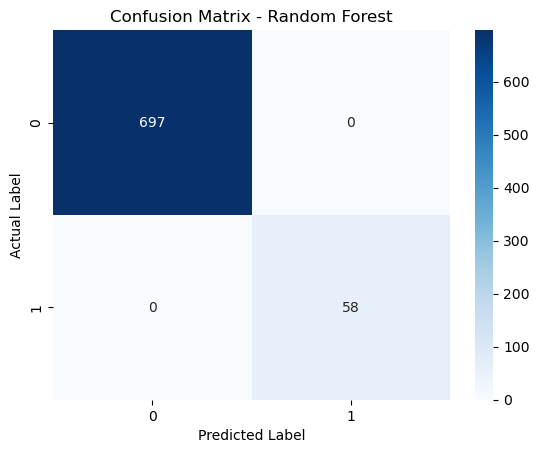

In [99]:
# Visualize Confusion Matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [101]:
# Predict whether a person has hypothyroid or not
def predict_hypothyroid(input_data):
    # Convert input data to DataFrame with proper column names
    input_data_df = pd.DataFrame([input_data], columns=X.columns)  # Use X.columns for valid feature names
    input_data_scaled = scaler.transform(input_data_df)  # Scale the input data
    input_data_rfe = rfe_selector.transform(input_data_scaled)  # Apply RFE
    prediction = rf_model.predict(input_data_rfe)
    
    if prediction[0] == 1:
        return "The patient has hypothyroid disease."
    else:
        return "The patient does not have hypothyroid disease."

In [103]:
# Example: Predict based on a patient's data
# Sample patient data (randomly taken from X_test)
sample_patient_data = X_test.iloc[0].values
prediction_result = predict_hypothyroid(sample_patient_data)
print("\nPrediction Result for Sample Patient:")
print(prediction_result)


Prediction Result for Sample Patient:
The patient does not have hypothyroid disease.
